# 聚类

**K-Means 聚类**

K-Means 算法是所有聚类算法中最流行且最简单的算法。下面是它的工作原理：

1. 选择认为最佳的类别数量$k$即样本大概可以分为多少个簇。
2. 在数据空间内随机初始化$k$点为“质心”。
3. 将每个观察数据点划分到于其最近的簇的质心的簇。
4. 将质心更新为一个簇中所有数据点的中心。
5. 重复步骤 3 和 4 步骤直到所有质心都相对稳定。

为了更好的理解 K-Means 算法的原理，这里通过一个例子来进行说明。先构建出一个数据集并画图它的分布图，该数据集含有三个簇。

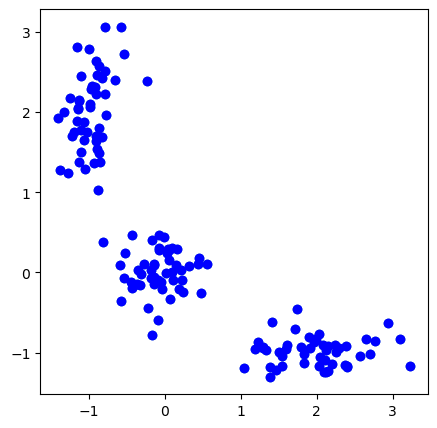

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = np.zeros((150,2))

np.random.seed(seed=42)

X[:50,0] = np.random.normal(loc = 0.0,scale=0.3,size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(5,5))
plt.plot(X[:,0],X[:,1],'bo')
# plt.scatter(X[:,0],X[:,1])
# 两个意思是等价的

In [21]:
# 调用 Scipy 库的距离计算函数，
# 用于计算数据点之间的距离
from scipy.spatial.distance import cdist

# 随机初始化三个中心点
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    # 计算每个点到中心的距离
    distances = cdist(X, centroids)
    # 获取数据别分到哪个簇
    labels = distances.argmin(axis=1)
    # 根据数据到每个簇质心的距离，标记这些点的类别
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)

    cent_history.append(centroids)

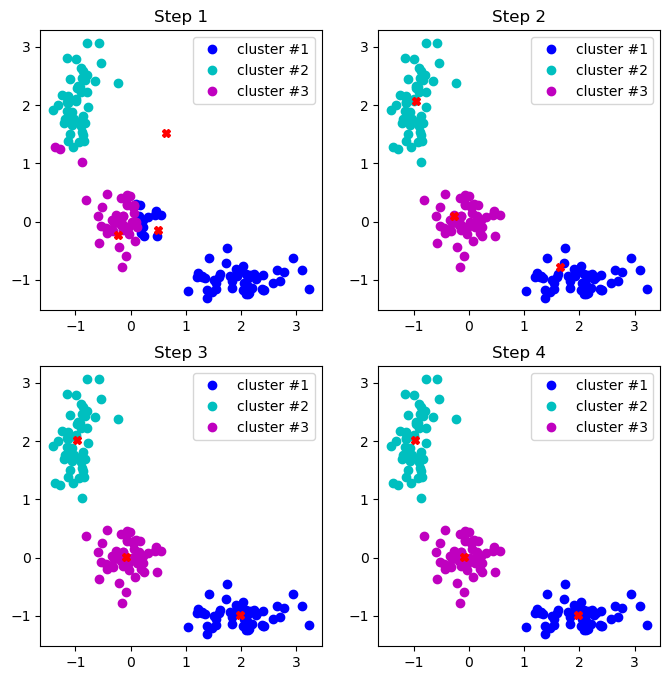

In [22]:
# 可视化 K 均值聚类步骤
plt.figure(figsize=(8, 8))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)

    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1))

In [23]:
from sklearn.cluster import KMeans  # 导入 K-均值聚类模型

相比于分类和回归等监督学习任务，聚类算法没有使用含标签的数据。因此，聚类需要更有效的模型评价方法。通常，当使用 K-Means 算法时，需要最小化观测数据点与其所在的簇的质心之间的平方距离之和。该值越小说明该类聚得越好。公式表达如下：

$$
J(C) = \sum^{k=1}_{K} \sum^{i\in C_k}_{k} ||x_i - \mu_k|| \rightarrow \min \limits_C,
$$

这里的 $C_k$ 是第 k 个簇所有样本的集合，$\mu_k$ 是 $C_k$ 的中心。

上面的定义看似合理，也就是希望数据点尽可能接近它们所属簇的质心。但也存在一个问题，当质心数（也就是 k 的值）等于样本数时，公式得到最优解，即 $J(C)$ 达到最小。此时的每个样本都会单独把自己作为一类。这显然是没有意义的。因为这结果相当于没有进行聚类。

为了避免这种情况，我们应该定义一个函数，使得 $J(C)$ 下降得不那么快。使用公式描述如下：

$$
D(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1}) - J(C_k)|} \rightarrow \min \limits_k
$$

为了更好的理解，先看看一个例子。因为 scikit-learn 也提供了各种聚类算法接口，而且使用这些接口有许多优点。例如：这些算法可以并行完成，有效减少了计算时间。所以在这里为了方便，直接使用 scikit-learn 提供的 K-Means 接口进行实验。




d:\anaconda\envs\lanqiao\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda\envs\lanqiao\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda\envs\lanqiao\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda\envs\lanqiao\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0, 0.5, '$J(C_k)$')

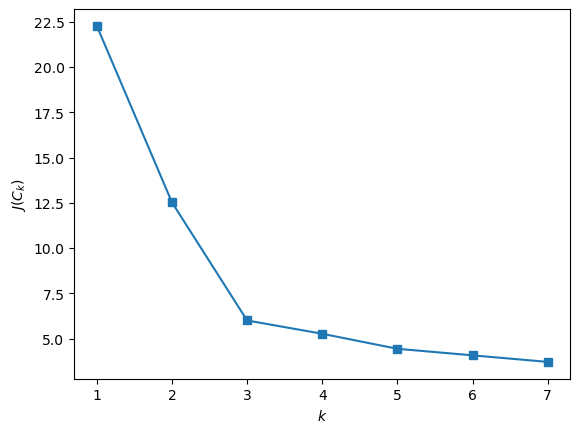

In [26]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k,random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1,8),inertia,marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

k小于3的时候$J(C_k)$平稳，代表k选择三比较合适

# 凝聚聚类

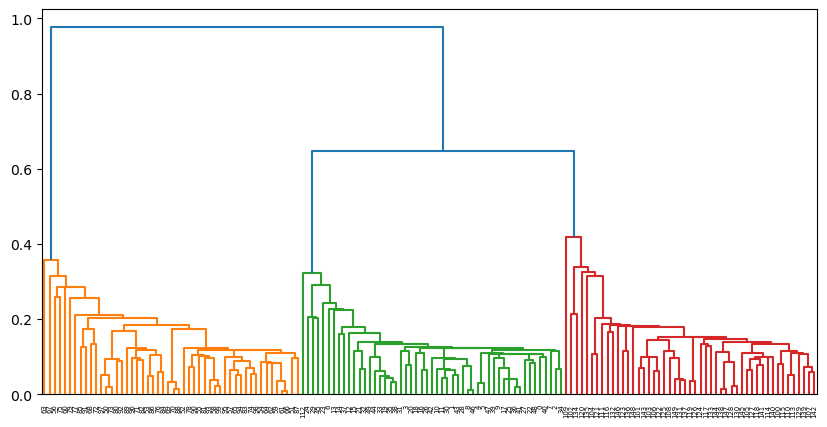

In [27]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))
# 构建数据集
np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

# pdist 将计算成对距离矩阵的上三角形
distance_mat = pdist(X)
# 连接 - 是一种凝聚算法的实现
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

# 聚类模型评价

In [28]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

In [29]:
data = datasets.load_digits()
X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=10, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=10))
# 一共四种


In [30]:
data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_, average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity', 'Completeness',
                                           'V-measure', 'Silhouette'],
                       index=['K-means', 'Affinity', 'Spectral', 'Agglomerative'])
results

d:\anaconda\envs\lanqiao\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.667179,0.736804,0.735623,0.743268,0.739426,0.182247
Affinity,0.174871,0.612364,0.958899,0.486801,0.645767,0.115161
Spectral,0.756461,0.852040,0.831691,0.876614,0.853562,0.182729
Agglomerative,0.794003,0.866832,0.857513,0.879096,0.868170,0.178497
